# Credit Card Fraud Detection

## 0. Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Read data  

data from: https://www.kaggle.com/mlg-ulb/creditcardfraud

El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.
Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284.807.  

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las características originales y más información de fondo sobre los datos. Las características V1, V2,… V28 son los componentes principales obtenidos con PCA, las únicas características que no se han transformado con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Importe' es el Importe de la transacción; esta función se puede utilizar para el aprendizaje sensible al costo dependiente del ejemplo. La característica 'Clase' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Structure

In [3]:
df.shape

(284807, 31)

In [4]:
df.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [5]:
#check missing values
df.isnull().sum().sum()

0

el conjunto de datos no posee datos nulos

## 2. EDA

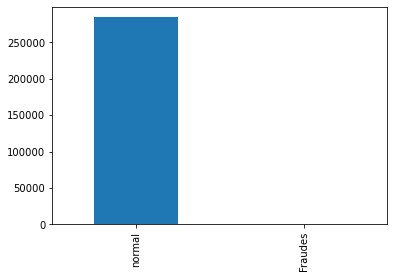

In [6]:
df['Class'].value_counts().plot.bar()
plt.xticks([0,1], ['normal', 'Fraudes'])
plt.show()

In [7]:
df['Class'].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172% de todas las transacciones.

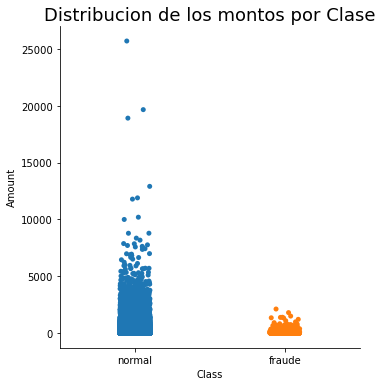

In [9]:
sns.catplot(x = 'Class', y= 'Amount', data = df)
plt.title('Distribucion de los montos por Clase', fontsize=18)
plt.xticks([0,1], ['normal', 'fraude'])
plt.show()

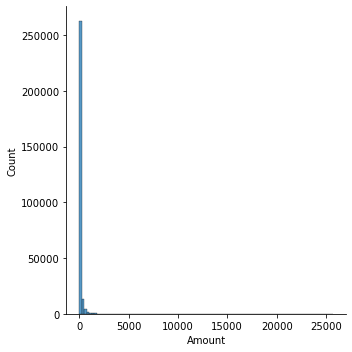

In [10]:
sns.displot(df['Amount'], bins = 100)
plt.show()

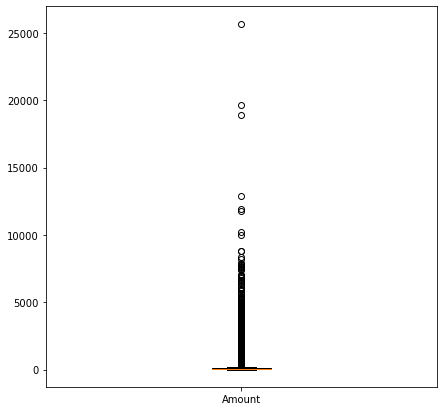

In [11]:
plt.figure(figsize=(7,7))
plt.boxplot(df['Amount'], patch_artist=True)
plt.xticks([1], ['Amount'])
plt.show()

In [12]:
amount_count = df['Amount'].value_counts().reset_index()
amount_count.columns=['montos', 'veces']
amount_count[amount_count['montos']>5000].sort_values(by= 'montos')

,montos,veces
21172,5026.26,1
31066,5114.10,1
16820,5130.30,1
18062,5239.50,1
19783,5259.00,1
30404,5268.04,1
17866,5303.69,1
27849,5317.28,1
24767,5341.41,1
26350,5356.42,1


In [13]:
trasc_mayor_5000 = df[df['Amount']>5000][['Time', 'Amount', 'Class']]

In [14]:
trasc_mayor_5000.groupby('Class')['Amount'].count()

Class
0    55
Name: Amount, dtype: int64

La variable Amount presenta 55   de transacciones Normales por encima de los 5,000 que van desde 5,026.26 hasta 25,691.16 dolares

In [15]:
trans_fraud = df[df['Class']==1]['Amount'].value_counts().reset_index()
trans_fraud.columns = ['monto', 'veces']
trans_fraud = trans_fraud.sort_values(by='veces', ascending= False)
trans_fraud.head()

,monto,veces
0,1.00,113
2,99.99,27
1,0.00,27
3,0.76,17
4,0.77,10


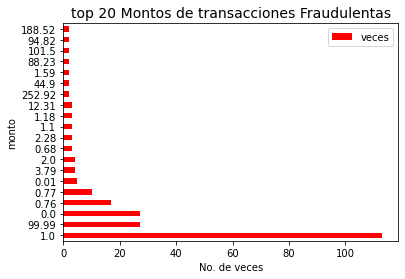

In [16]:
trans_fraud_top_20 = trans_fraud.head(20).set_index('monto')
trans_fraud_top_20.plot(kind='barh', color = 'red')
plt.title('top 20 Montos de transacciones Fraudulentas', fontsize=14)
plt.xlabel('No. de veces')
plt.show()

In [17]:
trans_fraud_top_20

,veces
monto,
1.00,113
99.99,27
0.00,27
0.76,17
0.77,10
0.01,5
3.79,4
2.00,4
0.68,3


In [18]:
#Simple Stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## 3. Cluster

In [19]:
from sklearn.cluster import KMeans

In [20]:
# Select features
X= df.drop('Class', axis =1)
y = df['Class']

### Elbow Method

In [36]:
score = []
k = range(1,15)
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(X)
    score.append(km.inertia_)

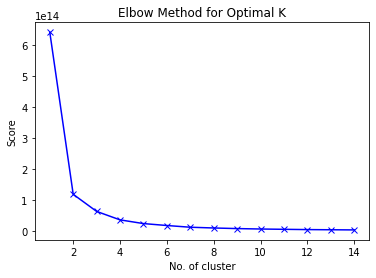

In [37]:
plt.plot(k, score, 'bx-')
plt.xlabel('No. of cluster')
plt.ylabel('Score')
plt.title('Elbow Method for Optimal K')
plt.show()

In [38]:
km_3 = KMeans(n_clusters=3)
km_3.fit(X)
cluster_pred = km_3.predict(X)

In [39]:
df['cluster'] = cluster_pred
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,cluster
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,2
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,2
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,2
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,2
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,2


In [40]:
df['cluster'].unique()

array([2, 0, 1])

In [44]:
df['cluster'].value_counts()

1    128491
0     84655
2     71661
Name: cluster, dtype: int64

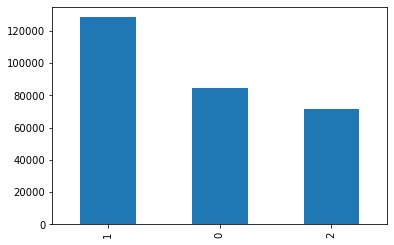

In [46]:
df['cluster'].value_counts().plot(kind= 'bar');

In [47]:
cluster_0 = df[df['cluster']==0][['Amount', 'Class', 'cluster']]
cluster_1 = df[df['cluster']==1][['Amount', 'Class', 'cluster']]
cluster_2 = df[df['cluster']==2][['Amount', 'Class', 'cluster']]

In [52]:
cluster_0[cluster_0['cluster']!=cluster_0['Class']]

,Amount,Class,cluster
72757,1.79,1,0
73784,1.00,1,0
73857,0.83,1,0
74496,0.83,1,0
74507,130.44,1,0
...,...,...,...
154697,7.59,1,0
154718,0.00,1,0
154719,0.00,1,0
154720,119.74,1,0


In [53]:
cluster_1[cluster_1['cluster']!=cluster_1['Class']]

,Amount,Class,cluster
156316,11.27,0,1
156317,11.27,0,1
156318,1.51,0,1
156319,59.00,0,1
156320,415.37,0,1
...,...,...,...
284802,0.77,0,1
284803,24.79,0,1
284804,67.88,0,1
284805,10.00,0,1


In [54]:
cluster_2[cluster_2['cluster']!=cluster_2['Class']]

,Amount,Class,cluster
0,149.62,0,2
1,2.69,0,2
2,378.66,0,2
3,123.50,0,2
4,69.99,0,2
...,...,...,...
71656,20.17,0,2
71657,40.00,0,2
71658,814.07,0,2
71659,49.95,0,2


In [55]:
km_2 = KMeans(n_clusters=2)
km_2.fit(X)
prediction_2 = km_2.predict(X)

In [56]:
df['Clusters_km2'] = prediction_2

In [57]:
df[df['Clusters_km2']!= df['Class']]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,cluster,Clusters_km2
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,2,0
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,2,0
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,2,0
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,2,0
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1,1
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1,1
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1,1
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1,1


In [58]:
df['Clusters_km2'].value_counts()

0    153163
1    131644
Name: Clusters_km2, dtype: int64

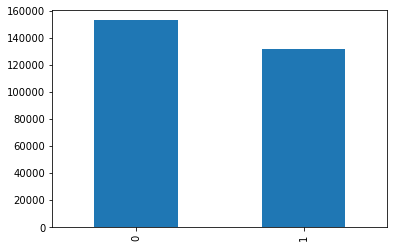

In [59]:
df['Clusters_km2'].value_counts().plot(kind='bar');

In [63]:
df[df['Clusters_km2']==0]['Amount'].sort_values(ascending=True)

15656         0.00
6470          0.00
110954        0.00
11524         0.00
126436        0.00
            ...   
74699      8790.26
54018     11898.09
46841     12910.93
151296    18910.00
58465     19656.53
Name: Amount, Length: 153163, dtype: float64

Aplicamos un modelo de Cluster para ver si podemos verificar alguna anomalia que no pudimos indentificar en nuestros Análisis de datos.